In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from LSTM import LSTM
from Helper import split_data, create_sequences

In [24]:
data = pd.read_csv('data.csv')
dates = data.iloc[:, [0]]

<AxesSubplot:>

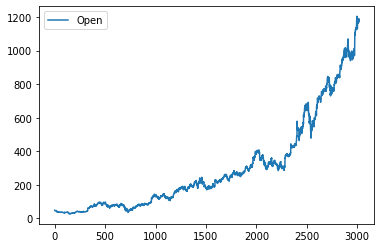

In [25]:
data.iloc[:,[1]].plot()

In [26]:
input_data = data.iloc[:,[1]]

scaler = MinMaxScaler()
scaler.fit(input_data)
input_data = scaler.transform(input_data)

input_data = pd.DataFrame(input_data)

In [27]:
x, y = create_sequences(input_data, 2)
x_train, x_test, y_train, y_test = split_data(x, y, 0.7)

In [28]:
print('x_train\t{}'.format(x_train.shape))
print('x_test\t{}'.format(x_test.shape))
print('y_train\t{}'.format(y_train.shape))
print('y_test\t{}'.format(y_test.shape))

x_train	(2111, 2, 1)
x_test	(905, 2, 1)
y_train	(2111, 1)
y_test	(905, 1)


In [29]:
learning_rate_list = [0.1, 0.01]
max_iterations_list = [50, 100, 150, 200, 250, 300, 350]
hidden_layers_list = [1, 2]
time_step_list = [2, 4]

In [35]:
obs = {
    'Learning Rate': [],
    'No of Hidden Layers': [],
    'Time Step': [],
    'Max Iterations': [],
    'R2 Score': [],
    'MSE': [],
    'RMSE': []
}

for i, hidden_layers in enumerate(hidden_layers_list):
    for learning_rate in learning_rate_list:
        for time_step in time_step_list:
            x, y = create_sequences(input_data, time_step)
            x_train, x_test, y_train, y_test = split_data(x, y, 0.7)
            for max_iterations in max_iterations_list:
                print('Training for:\r')
                print('Hidden Layers:\t{}\r'.format(hidden_layers))
                print('Learning Rate:\t{}\r'.format(learning_rate))
                print('Time Step:\t{}\r'.format(time_step))
                print('Max Iterations:\t{}\r'.format(max_iterations))
                model = LSTM(learning_rate=learning_rate, max_iterations=max_iterations, time_step=time_step, input_shape=(1, 1), hidden_layers=hidden_layers)
                
                model.fit(x_train, y_train)
                y_pred = model.predict(x_test)
                
                obs['Learning Rate'].append(learning_rate)
                obs['No of Hidden Layers'].append(hidden_layers)
                obs['Time Step'].append(time_step)
                obs['Max Iterations'].append(max_iterations)
                obs['R2 Score'].append(r2_score(y_test, y_pred))
                obs['MSE'].append(mean_squared_error(y_test, y_pred, squared=True))
                obs['RMSE'].append(mean_squared_error(y_test, y_pred, squared=False))

Training for:
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	50
Training for: loss : [[8.76655994e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	100
Training for:- loss : [[2.57902979e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	150
Training for: - loss : [[1.89465132e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	200
Training for: - loss : [[1.82449148e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	250
Training for: - loss : [[1.81840761e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	300
Training for: - loss : [[1.81430336e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	2
Max Iterations:	350
Training for: - loss : [[1.81368596e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	4
Max Iterations:	50
Training for: loss : [[2.38571006e-05]]
Hidden Layers:	1
Learning Rate:	0.1
Time Step:	4
Max Iterations:	100
Training for:- loss : [[2.22364567e-

In [ ]:
observations = pd.DataFrame.from_dict(obs)

In [ ]:
observations.to_csv('Observations.csv', index=False)

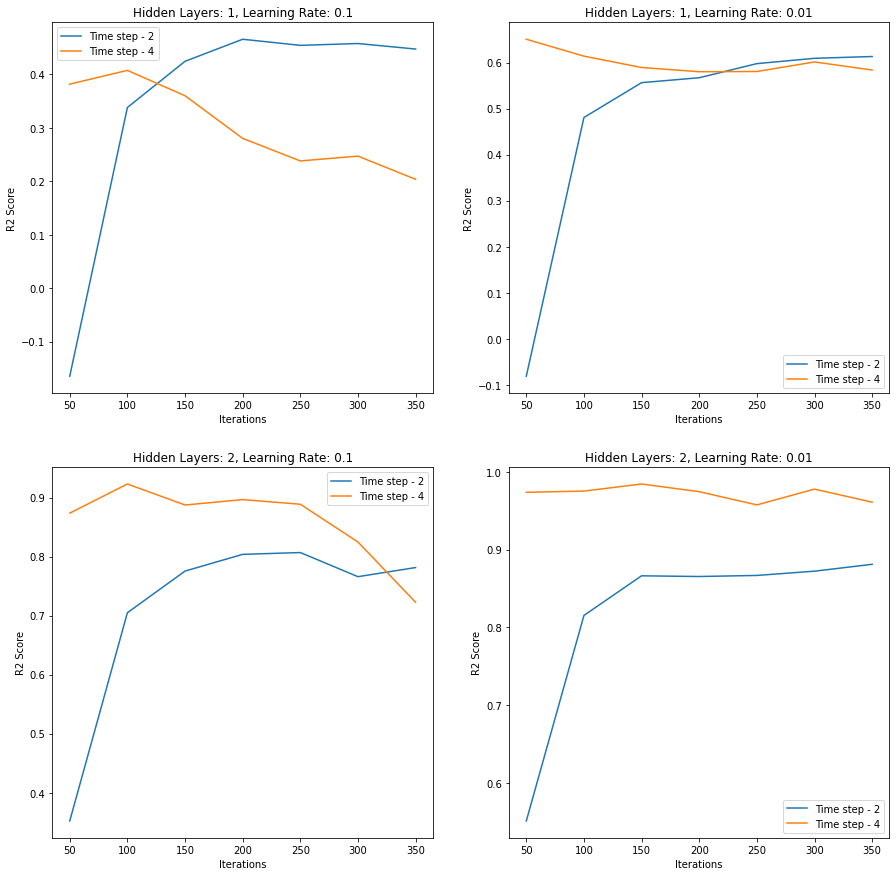

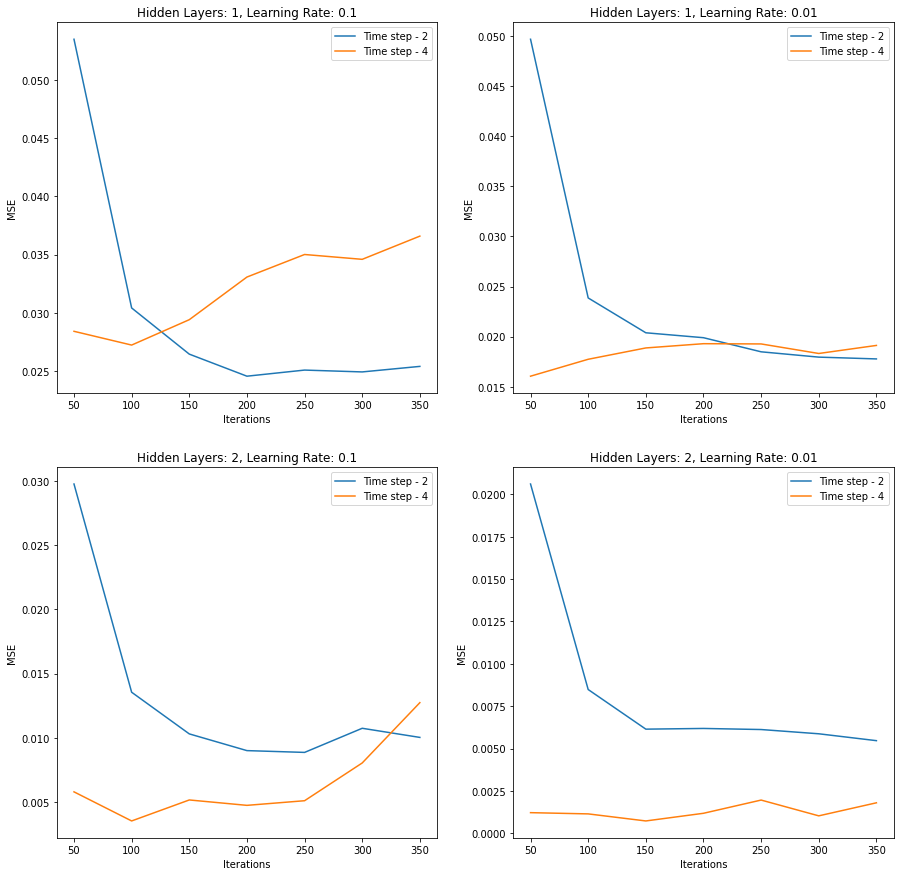

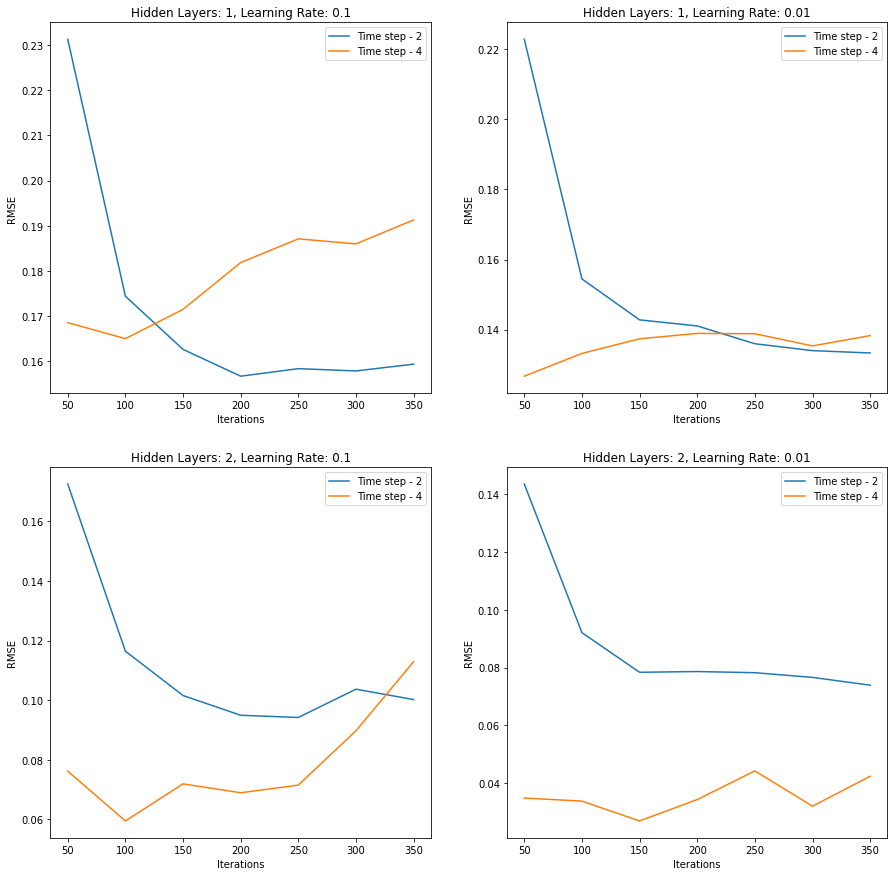

In [ ]:
for metric in ['R2 Score', 'MSE', 'RMSE']:
    fig, ax = plt.subplots(2, 2, figsize=(15,15))
    for i, hidden_layers in enumerate(hidden_layers_list):
        for j, learning_rate in enumerate(learning_rate_list):
            for time_step in time_step_list:
                y = observations.loc[(observations['No of Hidden Layers'] == hidden_layers) &
                                     (observations['Learning Rate'] == learning_rate) &
                                     (observations['Time Step'] == time_step), [metric]]
                ax[i, j].plot(max_iterations_list, np.array(y))
                ax[i, j].set(xlabel='Iterations', ylabel=metric,
                             title='Hidden Layers: {}, Learning Rate: {}'.format(hidden_layers, learning_rate))
            ax[i, j].legend(['Time step - {}'.format(time_step) for time_step in time_step_list])
    plt.show()